## BOSTON HOUSING & GRADIENT DESCENT

![Alt text](image.png)

### HEMANT THAPA

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

### GRADIENT DESCENT 

##### When Mean Squared Error (MSE) converges to its minimum value, do Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) typically exhibit a similar convergence behavior, resulting in decreases and convergence to their respective minimum values?

##### Does the convergence behavior of RMSE and MAE closely mirror that of MSE during the optimization process, or are there variations depending on the dataset and optimization characteristics?

In [3]:
#Creating dataset 
data = [
    (1, 2),
    (2, 4),
    (3, 5),
    (4, 4)
]

![Alt text](image-3.png)

![Alt text](image-2.png)

In [4]:
# Setting the initial slope of the line (m)
m = 0.5

# Setting the initial y-intercept of the line (b)
b = 0.5

# Setting the learning rate for gradient descent, which determines the step size for updating the parameters
learning_rate = 0.01

# number of iterations for the gradient descent algorithm to run
iterations = 50


In [5]:
# iteration numbers for tracking the progress of the optimization process
iteration_list = []

# Mean Squared Error (MSE) values, which represent the model's error at each iteration
mse_list = []

# predicted y-values for each iteration of the optimization
y_pred_list = []

# gradients of 'm' with respect to the loss function at each iteration
dm_list = []

#  gradients of 'b' with respect to the loss function at each iteration
db_list = []

# updated values of 'm' at each iteration of the optimization
m_new_list = []

# updated values of 'b' at each iteration of the optimization
b_new_list = []

# Mean absolute error (MAE) values
mae_list = []

rmse_list = []

In [6]:
iteration_data = {
    'Iteration': iteration_list,
    'MSE': mse_list,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'dm': dm_list,
    'db': db_list,
    'm_new': m_new_list,
    'b_new': b_new_list
}


In [7]:
for iteration in range(iterations):
    # Calculate predicted values
    y_pred = [m * xi + b for xi, _ in data]
    
    # Calculate MSE
    mse = sum([(yi - ypi)**2 for (_, yi), ypi in zip(data, y_pred)]) / len(data)
    
    # Calculate MAE
    mae = sum([abs(yi - ypi) for (_, yi), ypi in zip(data, y_pred)]) / len(data)
    
    # Calculate RMSE
    rmse = (sum([(yi - ypi)**2 for (_, yi), ypi in zip(data, y_pred)]) / len(data)) ** 0.5
    
    # Calculate derivatives
    dm = (-2/len(data)) * sum([xi * (yi - ypi) for (xi, yi), ypi in zip(data, y_pred)])
    db = (-2/len(data)) * sum([yi - ypi for (_, yi), ypi in zip(data, y_pred)])
    
    # Update m and b
    m_new = m - learning_rate * dm
    b_new = b - learning_rate * db
    
    # Append values to lists
    iteration_list.append(iteration)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    y_pred_list.append(y_pred)
    dm_list.append(dm)
    db_list.append(db)
    m_new_list.append(m_new)
    b_new_list.append(b_new)

    # Print iteration details
    # print(f"Iteration {iteration + 1}: MSE = {mse:.4f}, MAE = {mae:.4f}, RMSE = {rmse:.4f}, m = {m:.4f}, b = {b:.4f}, dm = {dm:.4f}, db = {db:.4f}")
    
    # Update m and b for the next iteration
    m = m_new
    b = b_new

In [8]:
iteration_results = pd.DataFrame(iteration_data)


In [9]:
iteration_results

,Iteration,MSE,MAE,RMSE,dm,db,m_new,b_new
0,0,4.625000,2.000000,2.150581,-10.500000,-4.000000,0.605000,0.540000
1,1,3.467788,1.697500,1.862200,-8.725000,-3.395000,0.692250,0.573950
2,2,2.664329,1.445425,1.632277,-7.246500,-2.890850,0.764715,0.602859
3,3,2.106335,1.235354,1.451322,-6.014982,-2.470708,0.824865,0.627566
4,4,1.718667,1.060272,1.310979,-4.989200,-2.120545,0.874757,0.648771
5,5,1.449187,0.988236,1.203822,-4.134793,-1.828674,0.916105,0.667058
6,6,1.261719,0.958419,1.123263,-3.423140,-1.585361,0.950336,0.682911
7,7,1.131159,0.933376,1.063560,-2.830401,-1.382497,0.978640,0.696736
8,8,1.040091,0.912312,1.019848,-2.336716,-1.213327,1.002007,0.708870
9,9,0.976427,0.894562,0.988143,-1.925542,-1.072224,1.021263,0.719592


##### 1. Usually, when we're trying to minimize the Mean Squared Error (MSE) in gradient descent, we also see the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) decrease and reach their lowest values. This happens as we improve our model. However, how fast this happens and the exact details can depend on the data, model complexity, and how we're optimizing.



##### 2. RMSE and MAE behave somewhat like MSE during optimisation, but there can be differences. RMSE is like MSE but takes the square root of the errors, making it more sensitive to really big errors. MAE, which measures the average error without squaring, may not decrease as quickly as MSE or RMSE, especially when there are unusual data points. So, while RMSE and MAE generally follow the same pattern, they can show some differences, which we need to pay attention to when training and evaluating models in data science and machine learning.



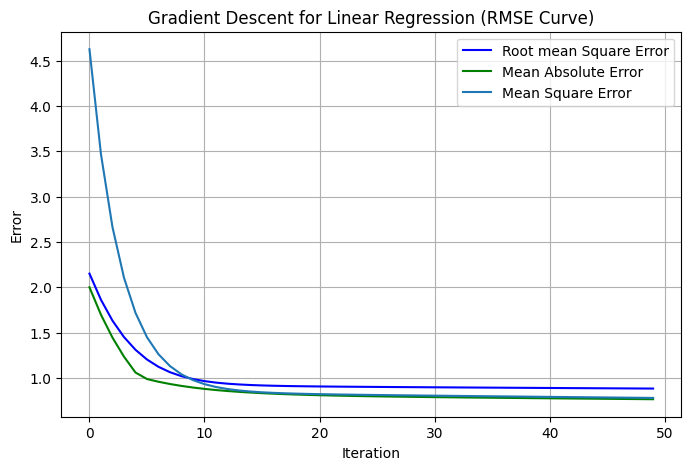

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(iteration_list, rmse_list, color='blue', label='Root mean Square Error')
plt.plot(iteration_list, mae_list, color='green', label='Mean Absolute Error') 
plt.plot(iteration_list, mse_list, label='Mean Square Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent for Linear Regression (RMSE Curve)')
plt.grid(True)
plt.legend()
plt.show()

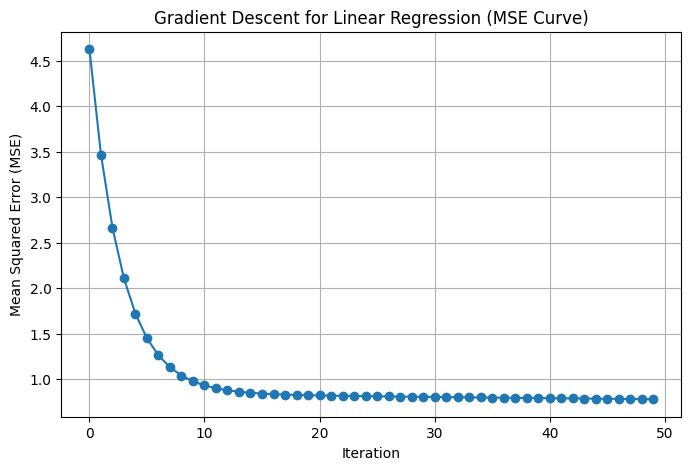

In [11]:
#Mean Squared Error (MSE) curve
plt.figure(figsize=(8, 5))
plt.plot(iteration_list, mse_list, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Gradient Descent for Linear Regression (MSE Curve)')
plt.grid(True)
plt.show()

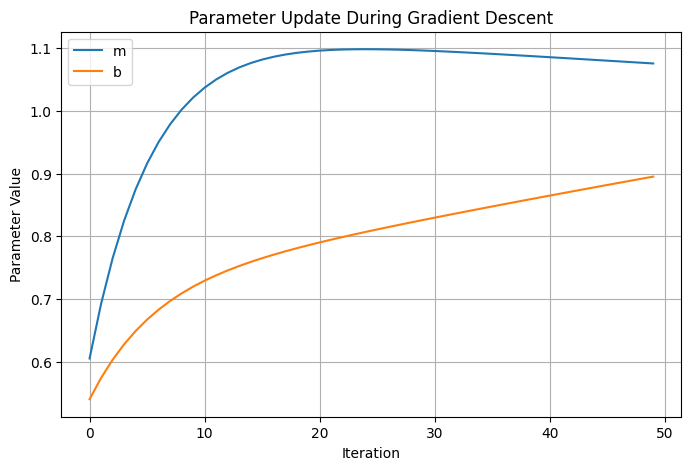

In [12]:
#Plotting 'm' and 'b' values over iterations
plt.figure(figsize=(8, 5))
plt.plot(iteration_list, m_new_list, label='m')
plt.plot(iteration_list, b_new_list, label='b')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Parameter Update During Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

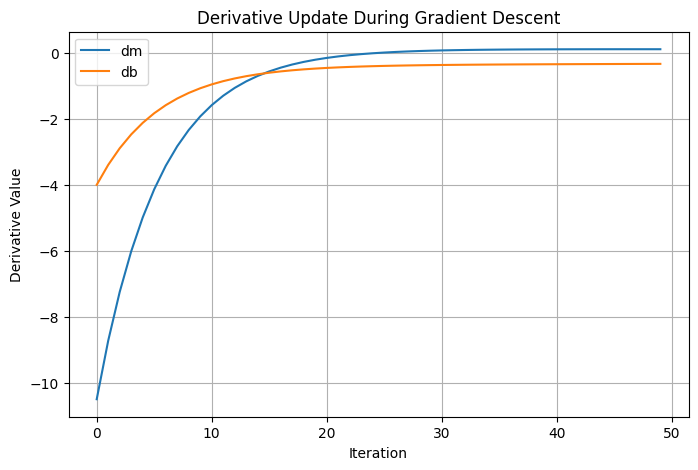

In [13]:
#Plotting 'dm' and 'db' values over iterations
plt.figure(figsize=(8, 5))
plt.plot(iteration_list, dm_list, label='dm')
plt.plot(iteration_list, db_list, label='db')
plt.xlabel('Iteration')
plt.ylabel('Derivative Value')
plt.title('Derivative Update During Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


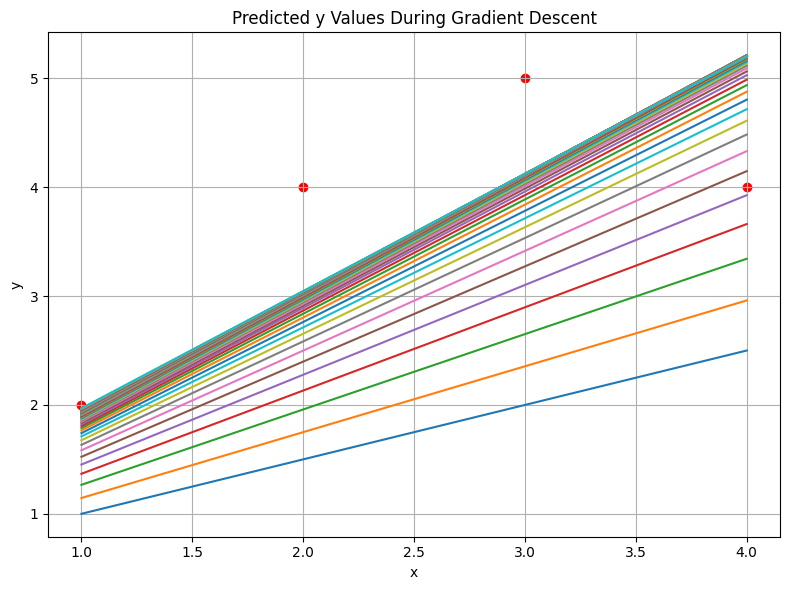

In [14]:
#Plotting predicted 'y' values and data points
plt.figure(figsize=(8, 6))
for i, y_pred in enumerate(y_pred_list):
    plt.plot([xi for xi, _ in data], y_pred, label=f'Iteration {i+1}')
for xi, yi in data:
    plt.scatter(xi, yi, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted y Values During Gradient Descent')
plt.grid(True)
plt.tight_layout()
plt.show()


#### BOSTON HOUSING DATA

#### 1. Loading Boston Dataset

In [15]:
#loading dataset
df = pd.read_csv('boston.csv')

In [16]:
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Columns in the Dataset

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxides concentration (parts per 10 million) [parts/10M].
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property-tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: Result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- **LSTAT**: Percentage of lower status of the population.
- **MEDV**: Median value of owner-occupied homes in $1,000s.


#### 2. Pre Processing 

In [17]:
#checking shape of dataset
df.shape

(506, 14)

We have 506 rows and 14 columns in our dataset.

In [18]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- **float64**: This data type is used to represent floating-point numbers, which are numbers with a decimal point. Columns with this data type typically store values like 3.14, 0.5, or -123.456. In your dataset, several columns, such as CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, and MEDV, are of type `float64`.

- **int64**: This data type is used for integers, which are whole numbers without decimal points. Columns with this data type store values like 1, 42, or -100. In your dataset, two columns, CHAS and RAD, are of type `int64`.


In [19]:
#converting float data to int
df['AGE'] = df['AGE'].astype(int)

In [20]:
#Checking null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [21]:
df.isnull().sum().sum()

0

We do not have any missing or null values in our dataset.

#### 3. Exploratory data analysis (EDA)

In [22]:
unique_age_counts = df['AGE'].value_counts()

In [23]:
unique_age_counts[:5]

AGE
100    43
98     20
97     18
96     16
94     15
Name: count, dtype: int64

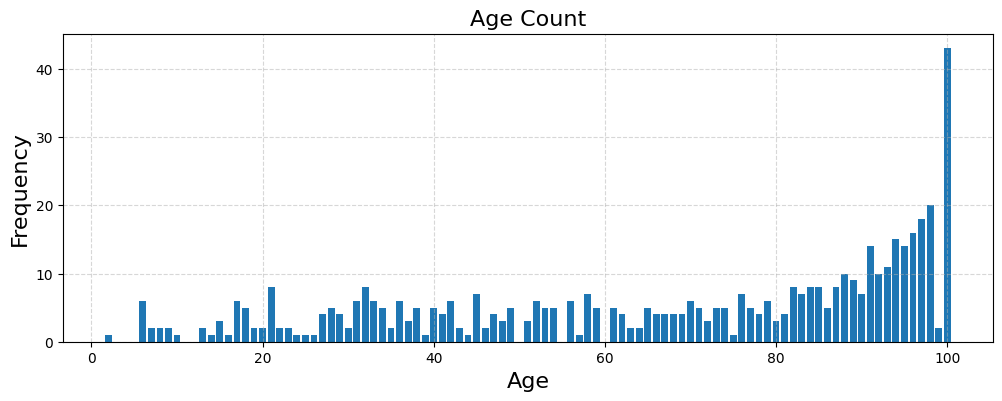

In [24]:
plt.figure(figsize=(12, 4))
plt.bar(unique_age_counts.index, unique_age_counts.values)
plt.grid(True, ls='--', alpha=0.5)
plt.title('Age Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.show()

100 year olds are maximum count in Age group and we have nearly 43 elders in our datasets. 

In [25]:
# Round the 'RM' values to the nearest integer with a threshold of 0.5
df['Rounded_RM'] = np.round(df['RM'] + 0.5)
average_rooms = df['Rounded_RM'].value_counts().reset_index()

In [26]:
#average rooms count
average_rooms

,Rounded_RM,count
0,7.0,269
1,6.0,158
2,8.0,51
3,9.0,13
4,5.0,13
5,4.0,2


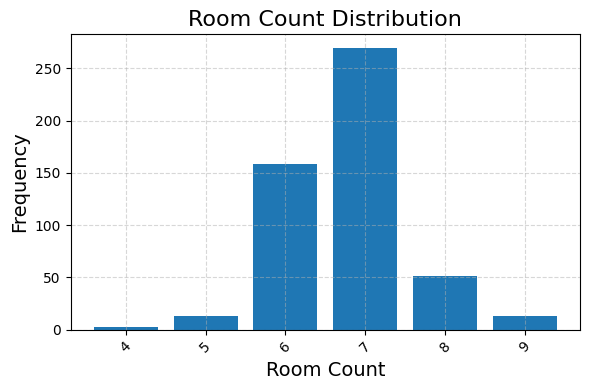

In [27]:
average_rooms.columns = ['Room Count', 'Frequency']
plt.figure(figsize=(6, 4))
plt.bar(average_rooms['Room Count'], average_rooms['Frequency'])
plt.grid(True, ls='--', alpha=0.5)
plt.title('Room Count Distribution', fontsize=16)
plt.xlabel('Room Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Highest Room counts is 7 with 269 houses and least room count is 4 with 2 house count. 

In [28]:
df.corr().style.applymap(lambda val: f'background-color: green' if abs(val) >= 0.7 else '')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Rounded_RM
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.353722,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.216039
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569667,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.271762
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644672,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.356320
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086118,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.068294
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731551,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.259478
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.241191,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.921099
AGE,0.353722,-0.569667,0.644672,0.086118,0.731551,-0.241191,1.000000,-0.747648,0.456475,0.506716,0.261051,-0.273849,0.603038,-0.377217,-0.201159
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747648,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.182281
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456475,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.184688
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506716,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.255715


Their is positive correlation between Age & NOX columns, where TAX  & RAD has strong positive correlation, Similary TAX & INDUS has second positive highest correlation. 

when it comes to negative correlation, we have DIS and INDUS, similary DIS & NOX are also negatively correlated. 

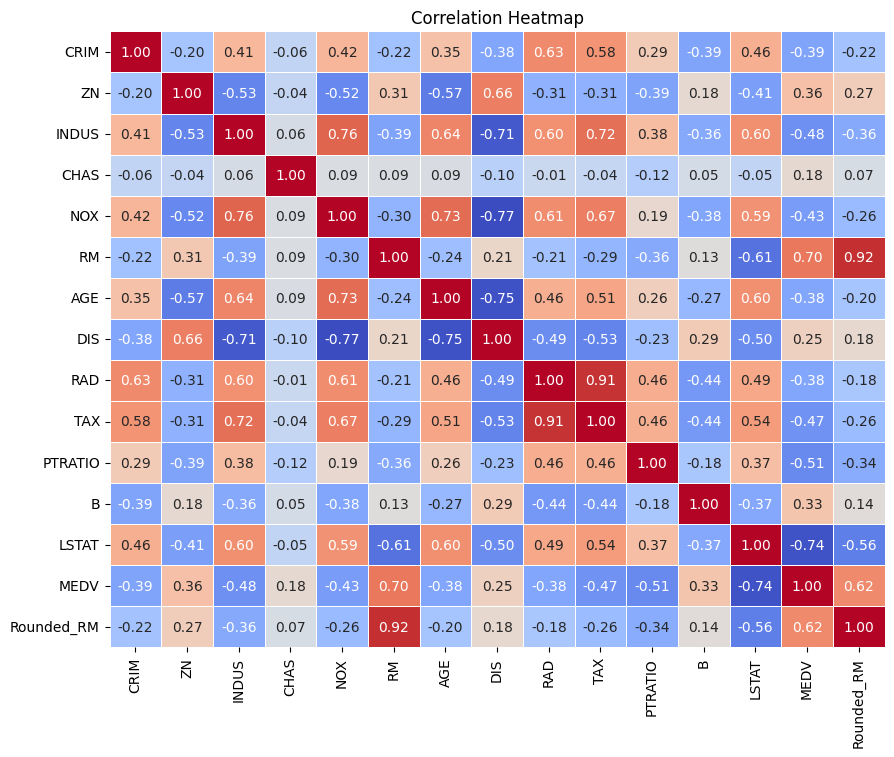

In [29]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)
plt.title("Correlation Heatmap")
plt.show()

#### 4. FEATURE ENGINEERING 

#### Feature Selection

 Dataset may contain a large number of features, but not all of them are relevant for the problem you're trying to solve. Feature selection involves choosing the most important features while discarding less useful ones. This can help reduce dimensionality and improve model efficiency.

In [30]:
#selecting columns
features = df.columns[0:13]
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
#Creating features
X = df[features]
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222.0,18.7,396.90,5.33


In [32]:
reshape_value = len(features)

In [33]:
#Converting 1 Dimensional to 2 Dimensional array
X = X.values.reshape(-1, reshape_value)
X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5000e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8000e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1000e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5000e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4000e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [34]:
#Slecting Target
y = df['MEDV'].values
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [35]:
#Checking Dimension
print(f'Features Dimension: {X.ndim}')
print(f'Target Dimesion: {y.ndim}')

Features Dimension: 2
Target Dimesion: 1


#### 5. Feature Scaling

Ensuring that all features are on a similar scale can be important for certain algorithms, such as those that rely on distances or gradients. Common scaling methods include standardization and normalization.

In [36]:
X = (X - X.mean())/X.std()
# y = (y - y.mean())/y.std()

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [38]:

#Creating Multiple Model to select best model
models = [
    ('OLS Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

In [39]:
# hyperparameters to tune for each model
param_grids = [
    # For OLS, we don't have specific hyperparameters to tune
    {},
    # For Ridge, tune the alpha (regularization strength) parameter
    {'alpha': [0.01, 0.1, 1.0, 10.0]},
    # For Lasso, tune the alpha (regularization strength) parameter
    {'alpha': [0.01, 0.1, 1.0, 10.0]}
]


#### 6. GridSearchCV 

The line of code below demonstrates the use of the `GridSearchCV` class from scikit-learn to perform hyperparameter tuning for a machine learning model:

```python
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')



- **GridSearchCV**: This is a class in scikit-learn that performs an exhaustive search over a specified hyperparameter grid. It helps you find the best hyperparameters for a machine learning model.

- **k (Model)**: In the context of the code, `model` represents a machine learning model. Specifically, it can be an instance of one of the linear regression models, such as Ordinary Least Squares (OLS) Linear Regression, Ridge Regression, or Lasso Regression.

- **param_grid (Hyperparameter Grid)**: `param_grid` is a dictionary that defines the hyperparameter grid you want to search over for the specified model (`model`). It lists the hyperparameters you want to tune and the range of values or options for each hyperparameter.

- **cv=5 (Cross-Validation)**: The `cv` parameter specifies the number of cross-validation folds to use during the grid search. Cross-validation is a technique used to assess a model's performance and generalization ability.

- **scoring='r2' (Scoring Metric)**: The `scoring` parameter specifies the scoring metric to use for evaluating the performance of the models during hyperparameter tuning. In the code, `'r2'` indicates that the R-squared (R2) score is used as the evaluation metric.

By combining these components, the code configures `GridSearchCV` to search for the best hyperparameters for a specific machine learning model (`model`) within a given hyperparameter grid (`param_grid`) while evaluating their performance using cross-validation and the R-squared scoring metric.


In [40]:
# For loop for hyperparameter tuning for each model
for (model_name, model), param_grid in zip(models, param_grids):
    #Measures the average absolute differences between predicted values and actual values. It is less sensitive to outliers compared to MSE.
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Evaluate the performance of the best model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Mean Squared Error on the test set: {mse:.2f}")
    print(f"R-squared on the test set: {r_squared:.2f}")
    print()


Model: OLS Linear Regression
Best Parameters: {}
Mean Squared Error on the test set: 24.29
R-squared on the test set: 0.67

Model: Ridge Regression
Best Parameters: {'alpha': 0.01}
Mean Squared Error on the test set: 23.40
R-squared on the test set: 0.68

Model: Lasso Regression
Best Parameters: {'alpha': 0.01}
Mean Squared Error on the test set: 25.92
R-squared on the test set: 0.65



In [41]:
# For loop for hyperparameter tuning for each model
for (model_name, model), param_grid in zip(models, param_grids):
     #Measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate a better fit.
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Evaluate the performance of the best model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Mean Squared Error on the test set: {mse:.2f}")
    print(f"R-squared on the test set: {r_squared:.2f}")
    print()



Model: OLS Linear Regression
Best Parameters: {}
Mean Squared Error on the test set: 24.29
R-squared on the test set: 0.67

Model: Ridge Regression
Best Parameters: {'alpha': 0.01}
Mean Squared Error on the test set: 23.40
R-squared on the test set: 0.68

Model: Lasso Regression
Best Parameters: {'alpha': 0.01}
Mean Squared Error on the test set: 25.92
R-squared on the test set: 0.65



#### 7. Lasso Model for Linear Regression 

In [42]:
#Selecting Ridge Model
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)

Ridge(alpha=0.01)

#### Making Predictions and Evaluating the Model

Now, it's time to use our trained model to make predictions on the test set and evaluate its performance. Here's how we do it step by step:

1. **Prediction**: We will use the test dataset, which includes features (independent variables) but not the target variable (the values we want to predict). Our model will generate predictions for the target variable based on these features. These predicted values are stored in a variable called `y_pred`.

2. **Actual Values**: The actual target values for the test set are stored in the variable `y_test`. These values represent the ground truth, meaning they are the real values we are trying to predict.

3. **Comparison**: We will compare the predicted values (`y_pred`) with the actual values (`y_test`) to assess how well our model performs. This comparison will give us insights into the accuracy and reliability of our predictions.

4. **Evaluation Metrics**: To quantify the model's performance, we will use evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). These metrics provide numerical measures of how close our predictions are to the actual values.

5. **Visualization**: To visualize the performance, we can create plots. For instance, a scatter plot comparing actual vs. predicted values can help us see how closely the points align with the perfect prediction line. The closer the points are to this line, the better our model's predictions.

Remember that the ultimate goal is to build a model that can accurately predict the target variable for new, unseen data. Evaluating the model on a test set with known outcomes helps us estimate its real-world performance.

In [43]:
X_test[:2]

array([[-0.48189275, -0.48252503, -0.45462415, -0.48252503, -0.47901159,
        -0.43832453,  0.09615983, -0.46429439, -0.4480795 ,  1.5566502 ,
        -0.36816588,  2.2421162 , -0.42024752],
       [-0.48213621, -0.20696081, -0.43836586, -0.47563593, -0.4794456 ,
        -0.43596846, -0.26207365, -0.45443401, -0.45496861,  1.26730777,
        -0.36127677,  2.25176095, -0.45820649]])

In [44]:
#prediction
y_pred = model.predict(X_test)

#### 8. MODEL EVALUATION

#### TEST SET

In [45]:
print(f'R Square: {r2_score(y_test, y_pred):.2f}')

R Square: 0.68


In [46]:
print(f'Mean Square Error: {mean_squared_error(y_test, y_pred):.2f}')

Mean Square Error: 23.40


In [47]:
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

Root Mean Square Error: 4.84


In [48]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

Mean Absolute Error: 3.21


#### TRAINING SET

In [49]:
y_pred_train = model.predict(X_train)

In [50]:
print(f'R Square: {r2_score(y_train, y_pred_train):.2f}')

R Square: 0.71


In [51]:
print(f'Mean Square Error: {mean_squared_error(y_train, y_pred_train):.2f}')

Mean Square Error: 25.38


In [52]:
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')

Root Mean Square Error: 5.04


In [53]:
print(f'Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

Mean Absolute Error: 3.59


#### 9. CHECKING UNDER FITTING & OVER FITTING

In [54]:
df_prediction = pd.DataFrame({'Actual':y_test,
                 'Prediction': y_pred})

In [55]:
df_prediction[:5]

,Actual,Prediction
0,23.6,29.224798
1,32.4,33.188898
2,13.6,11.993445
3,22.8,24.816413
4,16.1,19.266857


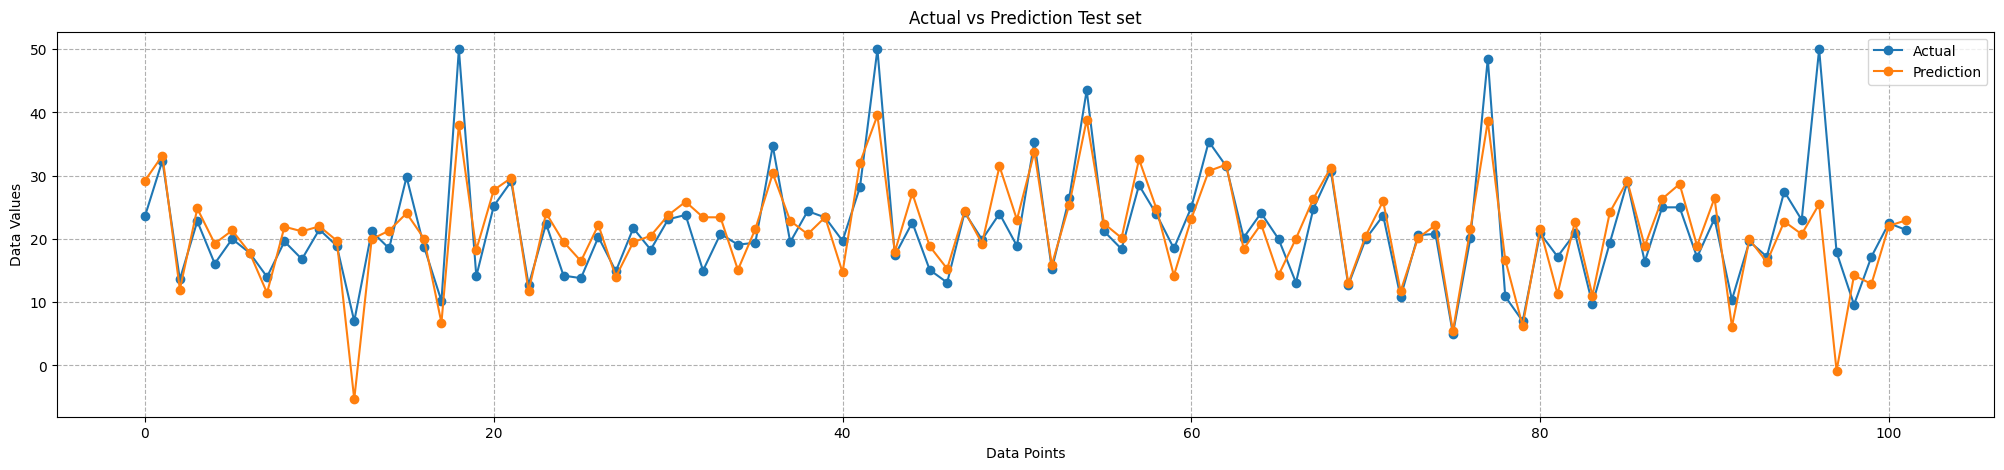

In [56]:
fig, ax = plt.subplots(figsize=(25, 5))  
df_prediction.plot(ax=ax, grid=True,marker='o')
plt.xlabel('Data Points')
plt.ylabel('Data Values')
ax.set_title("Actual vs Prediction Test set")
plt.grid(True, linestyle='--')
plt.show()

In [57]:
df_prediction_train = pd.DataFrame({'Actual':y_train,
                 'Prediction': y_pred_train})

In [58]:
df_prediction_train[:5]

,Actual,Prediction
0,12.0,10.805782
1,19.9,22.187127
2,19.4,24.143773
3,13.4,10.184008
4,18.2,20.702409


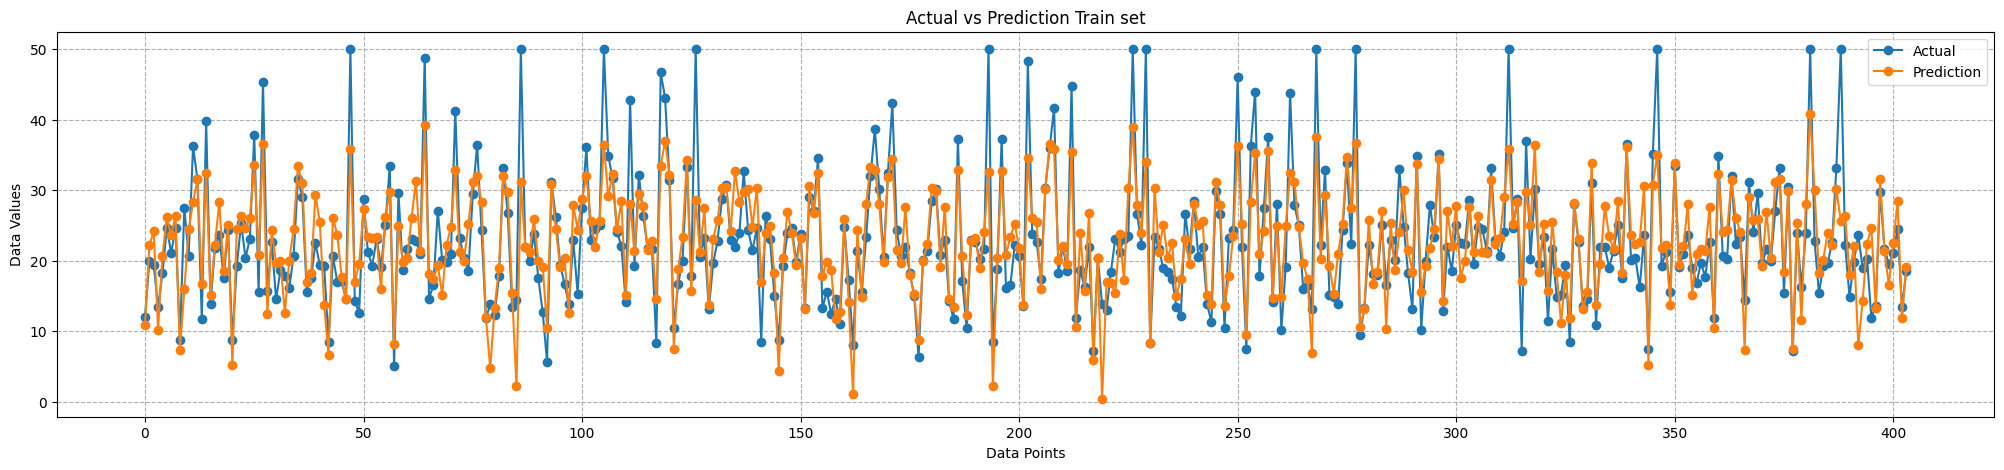

In [59]:
fig, ax = plt.subplots(figsize=(25, 5))  
df_prediction_train.plot(ax=ax, grid=True,marker='o')
ax.set_title("Actual vs Prediction Train set")
plt.grid(True, linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Data Values')
plt.show()

In [60]:
df_prediction[:5]

,Actual,Prediction
0,23.6,29.224798
1,32.4,33.188898
2,13.6,11.993445
3,22.8,24.816413
4,16.1,19.266857


In [61]:
df_prediction_train[:5]

,Actual,Prediction
0,12.0,10.805782
1,19.9,22.187127
2,19.4,24.143773
3,13.4,10.184008
4,18.2,20.702409


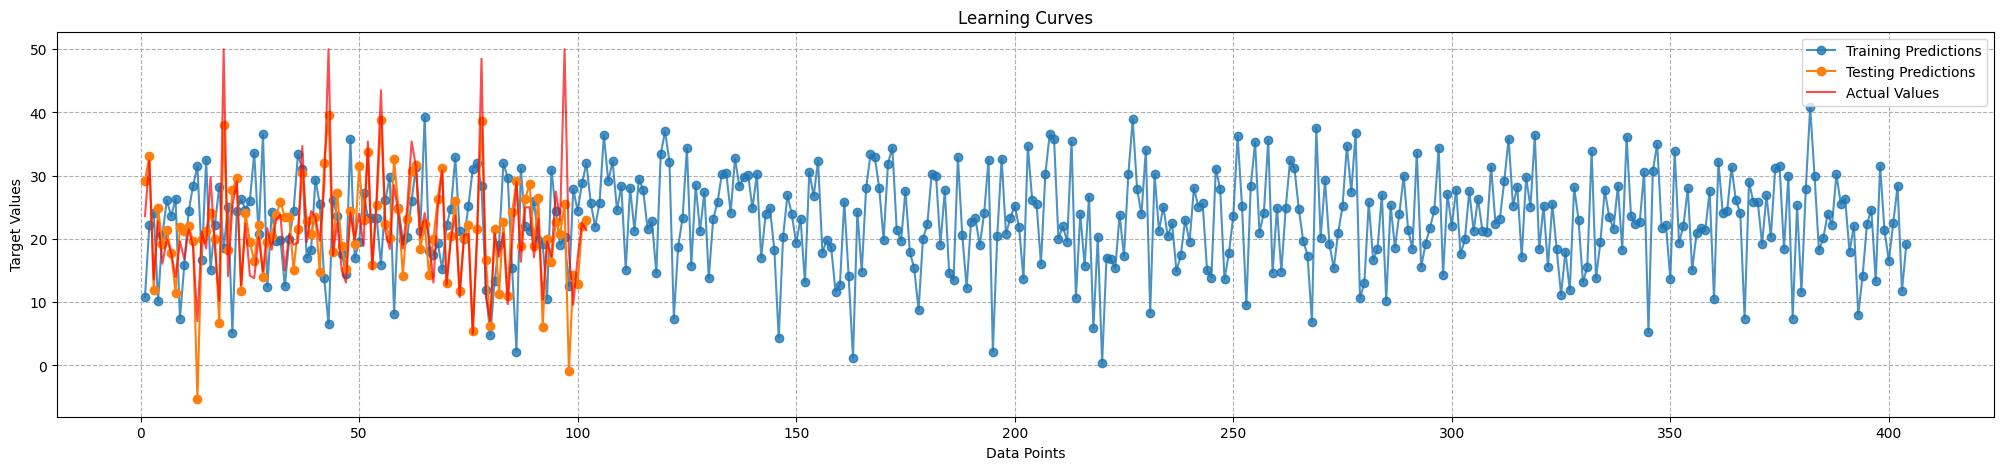

In [62]:
plt.figure(figsize=(25, 5))
plt.plot(range(1, len(y_pred_train) + 1), y_pred_train, label="Training Predictions", marker='o', alpha=0.8)
plt.plot(range(1, len(y_pred) + 1), y_pred, label="Testing Predictions", marker='o')
plt.plot(range(1, len(y_test) + 1), y_test, label="Actual Values", color='red', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

The code `[min(y_test), max(y_test)]` creates a list containing two values:

- `min(y_test)`: This value represents the minimum value in the `y_test` array.
- `max(y_test)`: This value represents the maximum value in the `y_test` array.

These two values together form a list that represents the range of values in the `y_test` array, with the first value being the minimum and the second value being the maximum. In the context of the code, this list is used to define the coordinates for plotting a diagonal line. This line is often used as a reference to visualize a perfect prediction scenario, showing how predicted values would align with actual values if the model's predictions were perfect.


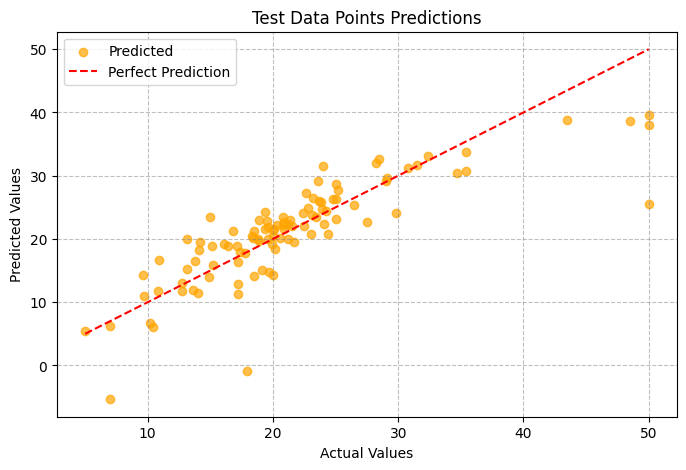

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data Points Predictions')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

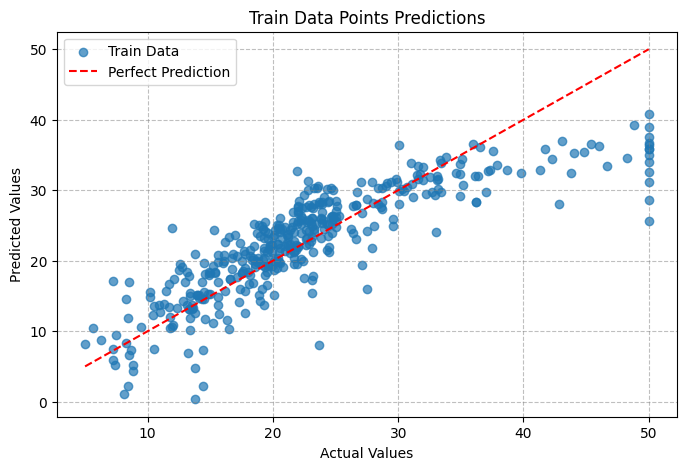

In [64]:
plt.figure(figsize=(8,5))
plt.scatter(y_train, y_pred_train, alpha=0.7, label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Data Points Predictions')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

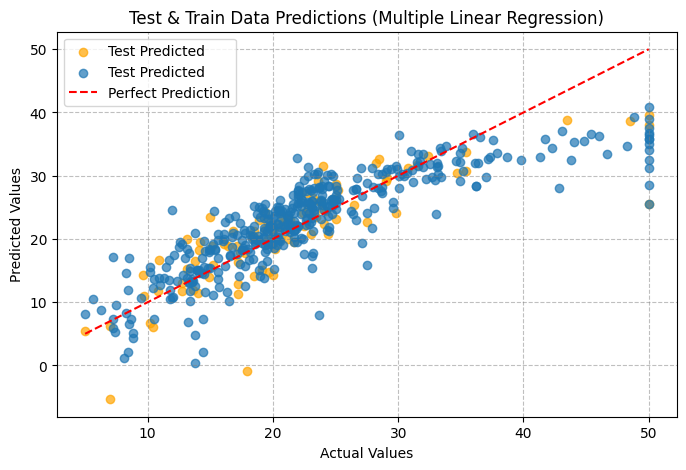

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Test Predicted', color='orange')
plt.scatter(y_train, y_pred_train, alpha=0.7, label='Test Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test & Train Data Predictions (Multiple Linear Regression)')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

### 9. GRADIENT DESCENT 

In [66]:
#loading dataset
df = pd.read_csv('boston.csv')

In [67]:
df[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### FEATURES ENGINEERING 

In [68]:
#Features selection
features = df.columns[0:13]
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [69]:
#checking value for rehsape features
reshape_value = len(features)
reshape_value

13

In [70]:
#selecting features column
X = df[features]

In [71]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [72]:
#StandardScaler
X = (X - X.mean())/X.std()

In [73]:
X[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [74]:
#converting to 2 dimensional
X = X.values.reshape(-1, reshape_value)
X[:5]

array([[-0.41936693,  0.28454827, -1.28663623, -0.27232907, -0.14407485,
         0.41326292, -0.11989477,  0.14007498, -0.98187119, -0.66594918,
        -1.45755797,  0.44061589, -1.07449897],
       [-0.41692667, -0.48724019, -0.59279438, -0.27232907, -0.73953036,
         0.19408239,  0.36680343,  0.55660905, -0.86702449, -0.98635338,
        -0.3027945 ,  0.44061589, -0.49195252],
       [-0.416929  , -0.48724019, -0.59279438, -0.27232907, -0.73953036,
         1.28144555, -0.26554897,  0.55660905, -0.86702449, -0.98635338,
        -0.3027945 ,  0.39603507, -1.20753241],
       [-0.4163384 , -0.48724019, -1.30558569, -0.27232907, -0.83445805,
         1.01529776, -0.80908783,  1.07667114, -0.75217779, -1.1050216 ,
         0.11292035,  0.41575141, -1.36017078],
       [-0.41207405, -0.48724019, -1.30558569, -0.27232907, -0.83445805,
         1.22736204, -0.51067434,  1.07667114, -0.75217779, -1.1050216 ,
         0.11292035,  0.44061589, -1.02548665]])

In [75]:
#Target
y = df['MEDV'].values

In [76]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

#### TRAIN TEST SPLIT

In [77]:
#Splitting data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.7, test_size=0.3, random_state=0)

In [78]:
# Add a column of ones for the bias term (theta0)
ones_column_train = np.ones((X_train.shape[0], 1))
X_train_b = np.hstack((ones_column_train, X_train))


In [79]:
X_train_b[:5]

array([[ 1.        , -0.23075895, -0.48724019,  1.56744433, -0.27232907,
         0.59808708, -1.80131441,  1.1163897 , -1.11869277, -0.63733109,
         0.17066179,  1.26768382,  0.44061589,  3.04673706],
       [ 1.        , -0.40677849,  0.37030254, -0.60882854, -0.27232907,
        -0.78267931,  0.36060266, -0.35080997,  0.05815488, -0.75217779,
        -1.09908819,  0.06672981,  0.41936607, -0.68940216],
       [ 1.        , -0.35525519, -0.48724019,  1.56744433, -0.27232907,
         0.59808708,  0.07168287,  1.05244395, -0.79989295, -0.63733109,
         0.17066179,  1.26768382,  0.41618955,  0.60312276],
       [ 1.        , -0.41258443,  2.51415937, -1.29683979, -0.27232907,
        -1.33498587,  0.08591537, -1.72209101,  1.91515312, -0.52248439,
        -0.29807769, -1.68851066,  0.12668805, -1.07589932],
       [ 1.        , -0.40929083, -0.48724019,  2.11552109, -0.27232907,
         0.22700611, -0.46061271,  0.86415924, -0.81119555, -0.86702449,
        -1.30675758,  0.29

In [80]:
# Initialise coefficients (theta) with random values
theta = [random.random() for _ in range(X_train_b.shape[1])]
theta

[0.22152925777490762,
 0.23274135523927697,
 0.5513824133026335,
 0.9572459623036996,
 0.031996956084691996,
 0.8954283533050337,
 0.9577285099431879,
 0.5758540469013157,
 0.8317921699556683,
 0.8429032786170606,
 0.9892958110802605,
 0.4496289152787738,
 0.9866072767744009,
 0.6442178468886837]

In [81]:
# Hyperparameters

#leaning rate
learning_rate = 0.01
#Number of iteration
num_iterations = 1000

#storing errors, coefficent and r square
iteration_list = []
mse_list = []
mae_list = [] 
rmse_list = [] 
r_squared_list = [] 
m_values = []
b_values = []

In [82]:
# Gradient Descent
for iteration in range(num_iterations):
    # predictions
    y_pred = np.dot(X_train_b, theta)  
    
    # Cost (MSE)
    total_error = np.sum((y_pred - y_train) ** 2)
    cost = total_error / len(y_train)
    
    # MAE and RMSE
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    
    # R-squared
    ssr = np.sum((y_pred - y_train) ** 2)
    sst = np.sum((y_train - np.mean(y_train)) ** 2)
    r_squared = 1 - (ssr / sst)
    
    # Gradient
    gradient = np.dot(X_train_b.T, (y_pred - y_train)) / len(y_train)
    
    # Update coefficients using the gradient
    theta -= learning_rate * gradient
    
    # Store values 
    iteration_list.append(iteration)
    mse_list.append(cost)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r_squared_list.append(r_squared) 
    m_values.append(theta[1])
    b_values.append(theta[0]) 

In [83]:
# Add a column of ones for the bias term (theta0) in the test set
ones_column_test = np.ones((X_test.shape[0], 1))
X_test_b = np.hstack((ones_column_test, X_test))

# predictions on the test set
y_test_pred = np.dot(X_test_b, theta)

# R-squared using y_test
ssr = np.sum((y_test_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ssr / sst)

# Mean Squared Error (MSE) manually
squared_errors = [(y_pred_i - y_i) ** 2 for y_pred_i, y_i in zip(y_test_pred, y_test)]
mse = sum(squared_errors) / len(y_test)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 28.035669637499915
R-squared: 0.66329789548236


#### 10. ERRORS PLOTS

1. ROOT MEAN SQUARE ERROR AND MEAN ABSOLUTE ERROR

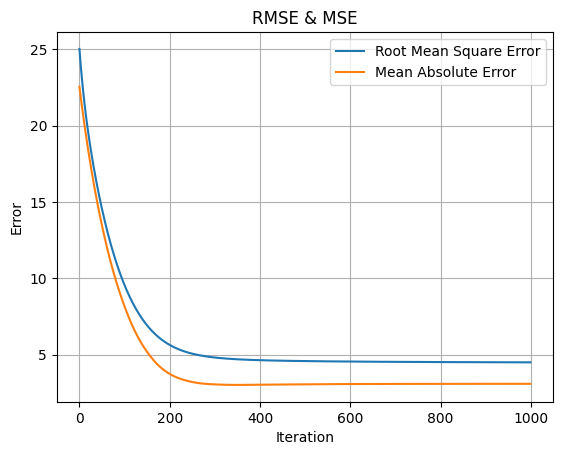

In [84]:
plt.plot(range(num_iterations), rmse_list, label='Root Mean Square Error')
plt.plot(range(num_iterations), mae_list, label='Mean Absolute Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('RMSE & MSE')
plt.grid(True)
plt.legend()
plt.show()

2. COST FUNCTION

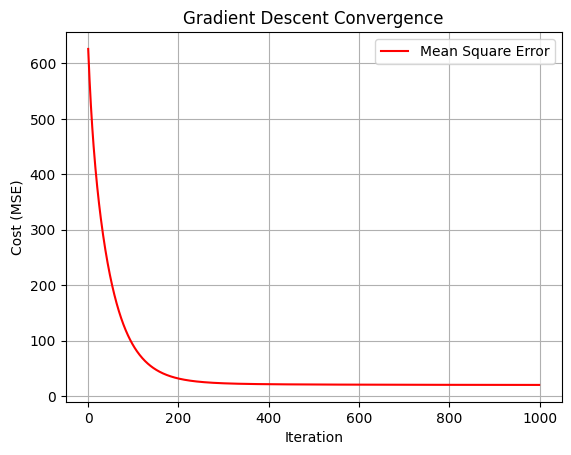

In [85]:
plt.plot(range(num_iterations), mse_list, color='red', label='Mean Square Error')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.legend()
plt.show()

##### 11. R SQUARE

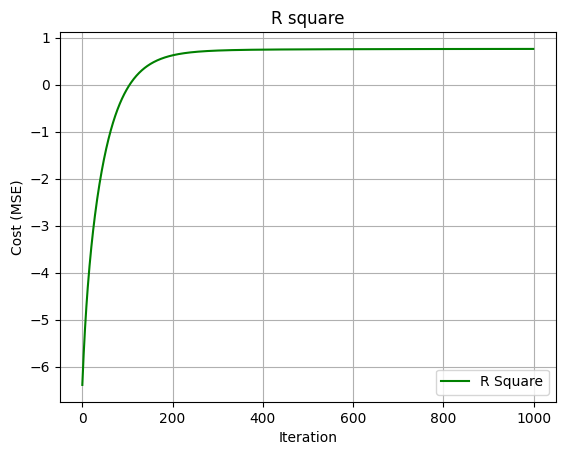

In [86]:
plt.plot(range(num_iterations), r_squared_list, color='Green', label='R Square')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('R square')
plt.grid(True)
plt.legend()
plt.show()

#### 12. CHECKING UNDER & OVER FITTING

In [87]:
df_result_iteration_train = pd.DataFrame(
    {'Actual':y_train,
     'Predicted':y_pred}
)

In [88]:
df_result_iteration_train[:5]

,Actual,Predicted
0,14.4,4.739772
1,24.4,27.828955
2,18.1,17.754792
3,22.5,29.414159
4,20.5,19.430180


In [89]:
df_result_iteration_test = pd.DataFrame(
    {'Actual':y_test,
     'Predicted':y_test_pred}
)

In [90]:
df_result_iteration_test[:5]

,Actual,Predicted
0,22.6,25.904945
1,50.0,22.940827
2,23.0,29.054505
3,8.3,11.772940
4,21.2,21.529080


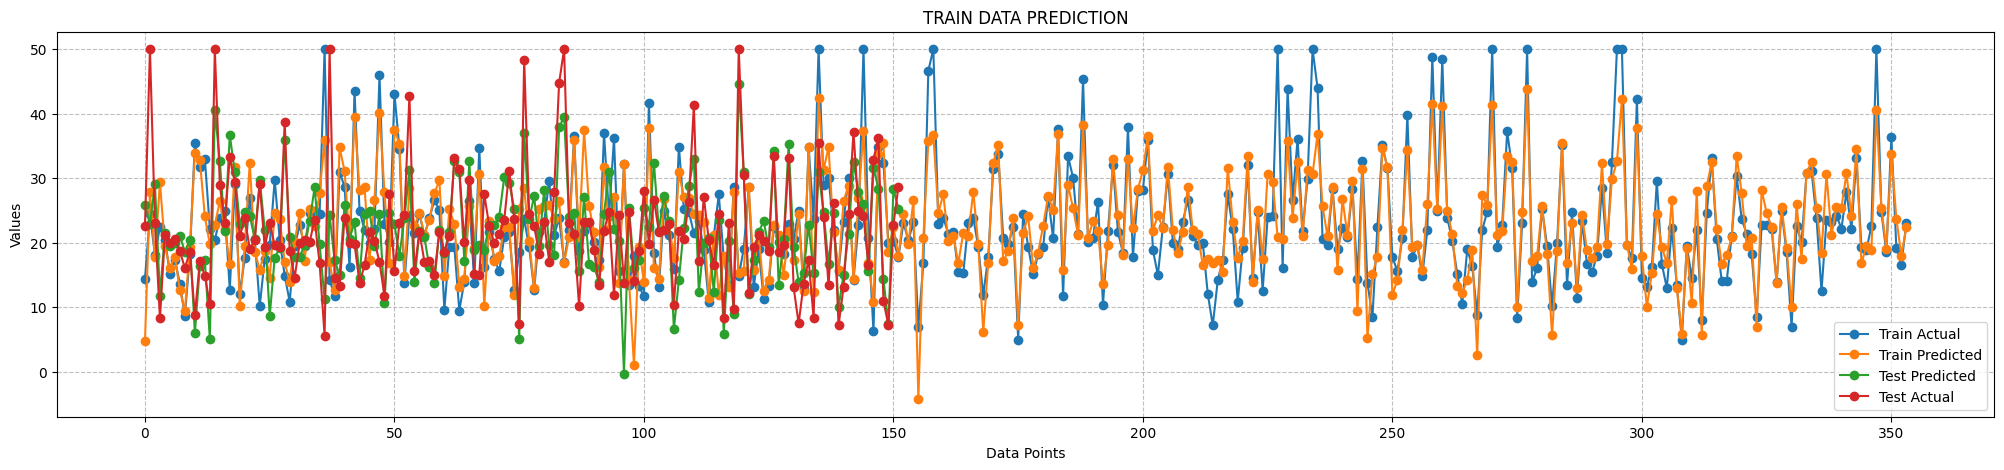

In [91]:
plt.figure(figsize=(25, 5))
plt.plot(df_result_iteration_train.index, df_result_iteration_train.Actual, marker='o', label='Train Actual')
plt.plot(df_result_iteration_train.index, df_result_iteration_train.Predicted, marker='o', label='Train Predicted')
plt.plot(df_result_iteration_test.index, df_result_iteration_test.Predicted,marker='o',  label='Test Predicted')
plt.plot(df_result_iteration_test.index, df_result_iteration_test.Actual, marker='o', label='Test Actual')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.title('TRAIN DATA PREDICTION')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

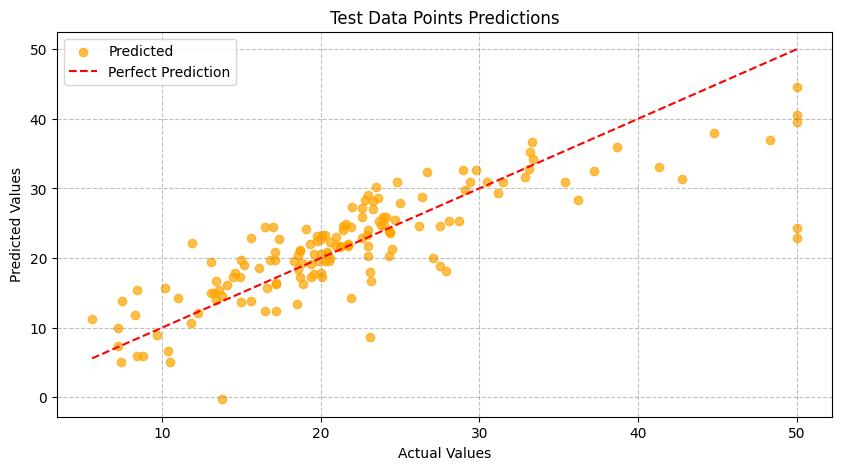

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Data Points Predictions')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

#### 13. COMPARING ERROR 

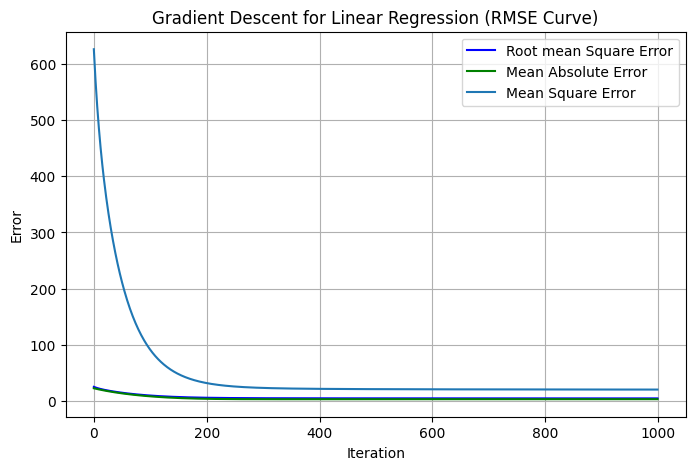

In [93]:
plt.figure(figsize=(8, 5))
plt.plot(iteration_list, rmse_list, color='blue', label='Root mean Square Error')
plt.plot(iteration_list, mae_list, color='green', label='Mean Absolute Error') 
plt.plot(iteration_list, mse_list, label='Mean Square Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent for Linear Regression (RMSE Curve)')
plt.grid(True)
plt.legend()
plt.show()

 Usually, when we're trying to minimize the Mean Squared Error (MSE) in gradient descent, we also see the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) decrease and reach their lowest values. This happens as we improve our model.

### REFERENCES: 

1. **Understanding the Mathematics Behind Gradient Descent**
   - Source: [Towards Data Science](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

2. **Gradient Descent Algorithm: A Deep Dive**
   - Source: [Towards Data Science](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

3. **The Boston House Price Data**
   - Source: [Kaggle](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)


#### Github: https://github.com/AnalyticalHarry
#### YouTube: https://www.youtube.com/@AnalyticalHarry